# Exploratory Data Analysis (EDA) for the Great American Coffee Taste Test Analysis

This notebook explores the dataset to find potential machine learning applications for model development.

First the necessary libraries are imported:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The datasets were uploaded to this GitHub repo. They where taken from and can be found on [Maven Analytics Data Playground](https://mavenanalytics.io/data-playground).

Here is a cool way to access a file directly from GitHub in Google Colab:

In [ ]:
question_key_url = 'https://raw.githubusercontent.com/Abdulrahman-AlAsali/Great-American-Coffee-Taste-Test-Analysis/main/QUESTION_KEY.csv'
main_ds_url = 'https://raw.githubusercontent.com/Abdulrahman-AlAsali/Great-American-Coffee-Taste-Test-Analysis/main/GACTT_RESULTS_ANONYMIZED_v2.csv'

Let's now have a look the question keys:

In [ ]:
df = pd.read_csv(question_key_url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Question Order  56 non-null     int64 
 1   Question        56 non-null     object
 2   Survey Section  56 non-null     object
 3   Question Type   56 non-null     object
 4   Answer Choices  46 non-null     object
 5   Notes           10 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


This file contains information about the questions in the survey. In total, there are 56 questions!

Let us now look at the first couple of questions:

In [ ]:
df.head()

,Question Order,Question,Survey Section,Question Type,Answer Choices,Notes
0,1,What is your age?,Background Information,Single select,"<18 years old, 18-24, 25-34, 35-44, 45-54, 55-...",NaN
1,2,How many cups of coffee do you typically drink...,Background Information,Single select,"Less than 1, 1, 2, 3, 4, More than 4",NaN
2,3,Where do you typically drink coffee?,Background Information,Multiple selection,"None of these, At home, At a cafe, On the go, ...",NaN
3,4,"On the go, where do you typically purchase cof...",Background Information,Multiple selection,"Other, Drive-thru, Specialty coffee shop, Nati...","Only available if ""On the go"" was selected in ..."
4,5,Where else do you purchase coffee?,Background Information,Text,NaN,"Only available if ""Other"" was selected in ques..."


From an initial look, there seems to be some questions with no answer choices and no notes.

Out of curiosity, let us have a look at how many:

In [ ]:
df.isnull().sum()

,0
Question Order,0
Question,0
Survey Section,0
Question Type,0
Answer Choices,10
Notes,46


Most of the questions don`t contain any notes, which is not an issue as the questions are easy to understand. Additionally, 10 questions did not contain any answer choices, likely because they are text questions.

Let's check to confirm this theory:

In [ ]:
df[df['Answer Choices'].isnull()]

,Question Order,Question,Survey Section,Question Type,Answer Choices,Notes
4,5,Where else do you purchase coffee?,Background Information,Text,NaN,"Only available if ""Other"" was selected in ques..."
6,7,How else do you brew coffee at home?,Background Information,Text,NaN,"Only available if ""Other"" was selected in ques..."
8,9,Please specify what your favorite coffee drink is,Background Information,Text,NaN,"Only available if ""Other"" was selected in ques..."
10,11,What else do you add to your coffee?,Background Information,Text,NaN,"Only available if ""Other"" was selected in ques..."
14,15,What other flavoring do you use?,Background Information,Text,NaN,"Supposedly available if ""Other"" was selected i..."
23,24,Coffee A - Notes,Taste Test Preferences,Text,NaN,NaN
27,28,Coffee B - Notes,Taste Test Preferences,Text,NaN,NaN
31,32,Coffee C - Notes,Taste Test Preferences,Text,NaN,NaN
35,36,Coffee D - Notes,Taste Test Preferences,Text,NaN,NaN
42,43,Other reason for drinking coffee,Additional Questions,Text,NaN,"Only available if ""Other"" was selected in ques..."


In this table, the question type is included.

Let us look at the frequency of each question type:

In [ ]:
df['Question Type'].value_counts()

,count
Question Type,
Single select,21
Number scale,13
Text,10
Multiple selection,8
Yes/No,4


Now let us look at how the questions in the survey are distributed accross the different sections:

In [ ]:
df['Survey Section'].value_counts()

,count
Survey Section,
Background Information,20
Taste Test Preferences,19
Additional Questions,17


Now let us look the main dataset:

In [ ]:
df = pd.read_csv(main_ds_url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 111 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(90)
memory usage: 3.4+ MB


Whoa! That's a lot of columns but they mostly consist of the survey questions, right?

So let us have a look:

In [ ]:
print(*df.columns, sep='\n')

Submission ID
What is your age?
How many cups of coffee do you typically drink per day?
Where do you typically drink coffee?
Where do you typically drink coffee? (At home)
Where do you typically drink coffee? (At the office)
Where do you typically drink coffee? (On the go)
Where do you typically drink coffee? (At a cafe)
Where do you typically drink coffee? (None of these)
How do you brew coffee at home?
How do you brew coffee at home? (Pour over)
How do you brew coffee at home? (French press)
How do you brew coffee at home? (Espresso)
How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))
How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))
How do you brew coffee at home? (Instant coffee)
How do you brew coffee at home? (Bean-to-cup machine)
How do you brew coffee at home? (Cold brew)
How do you brew coffee at home? (Coffee extract (e.g. Cometeer))
How do you brew coffee at home? (Other)
How else do you brew coffee at home?
On the go, where

Yup! thats right!

Now let us look at if there is any common submissions:

In [ ]:
'{:%}'.format(len(df[df.columns.difference(['Submission ID'])].drop_duplicates()) / len(df))

'99.554676%'

Nice! Most of the entries are unique.

So now let us look the any missing values:

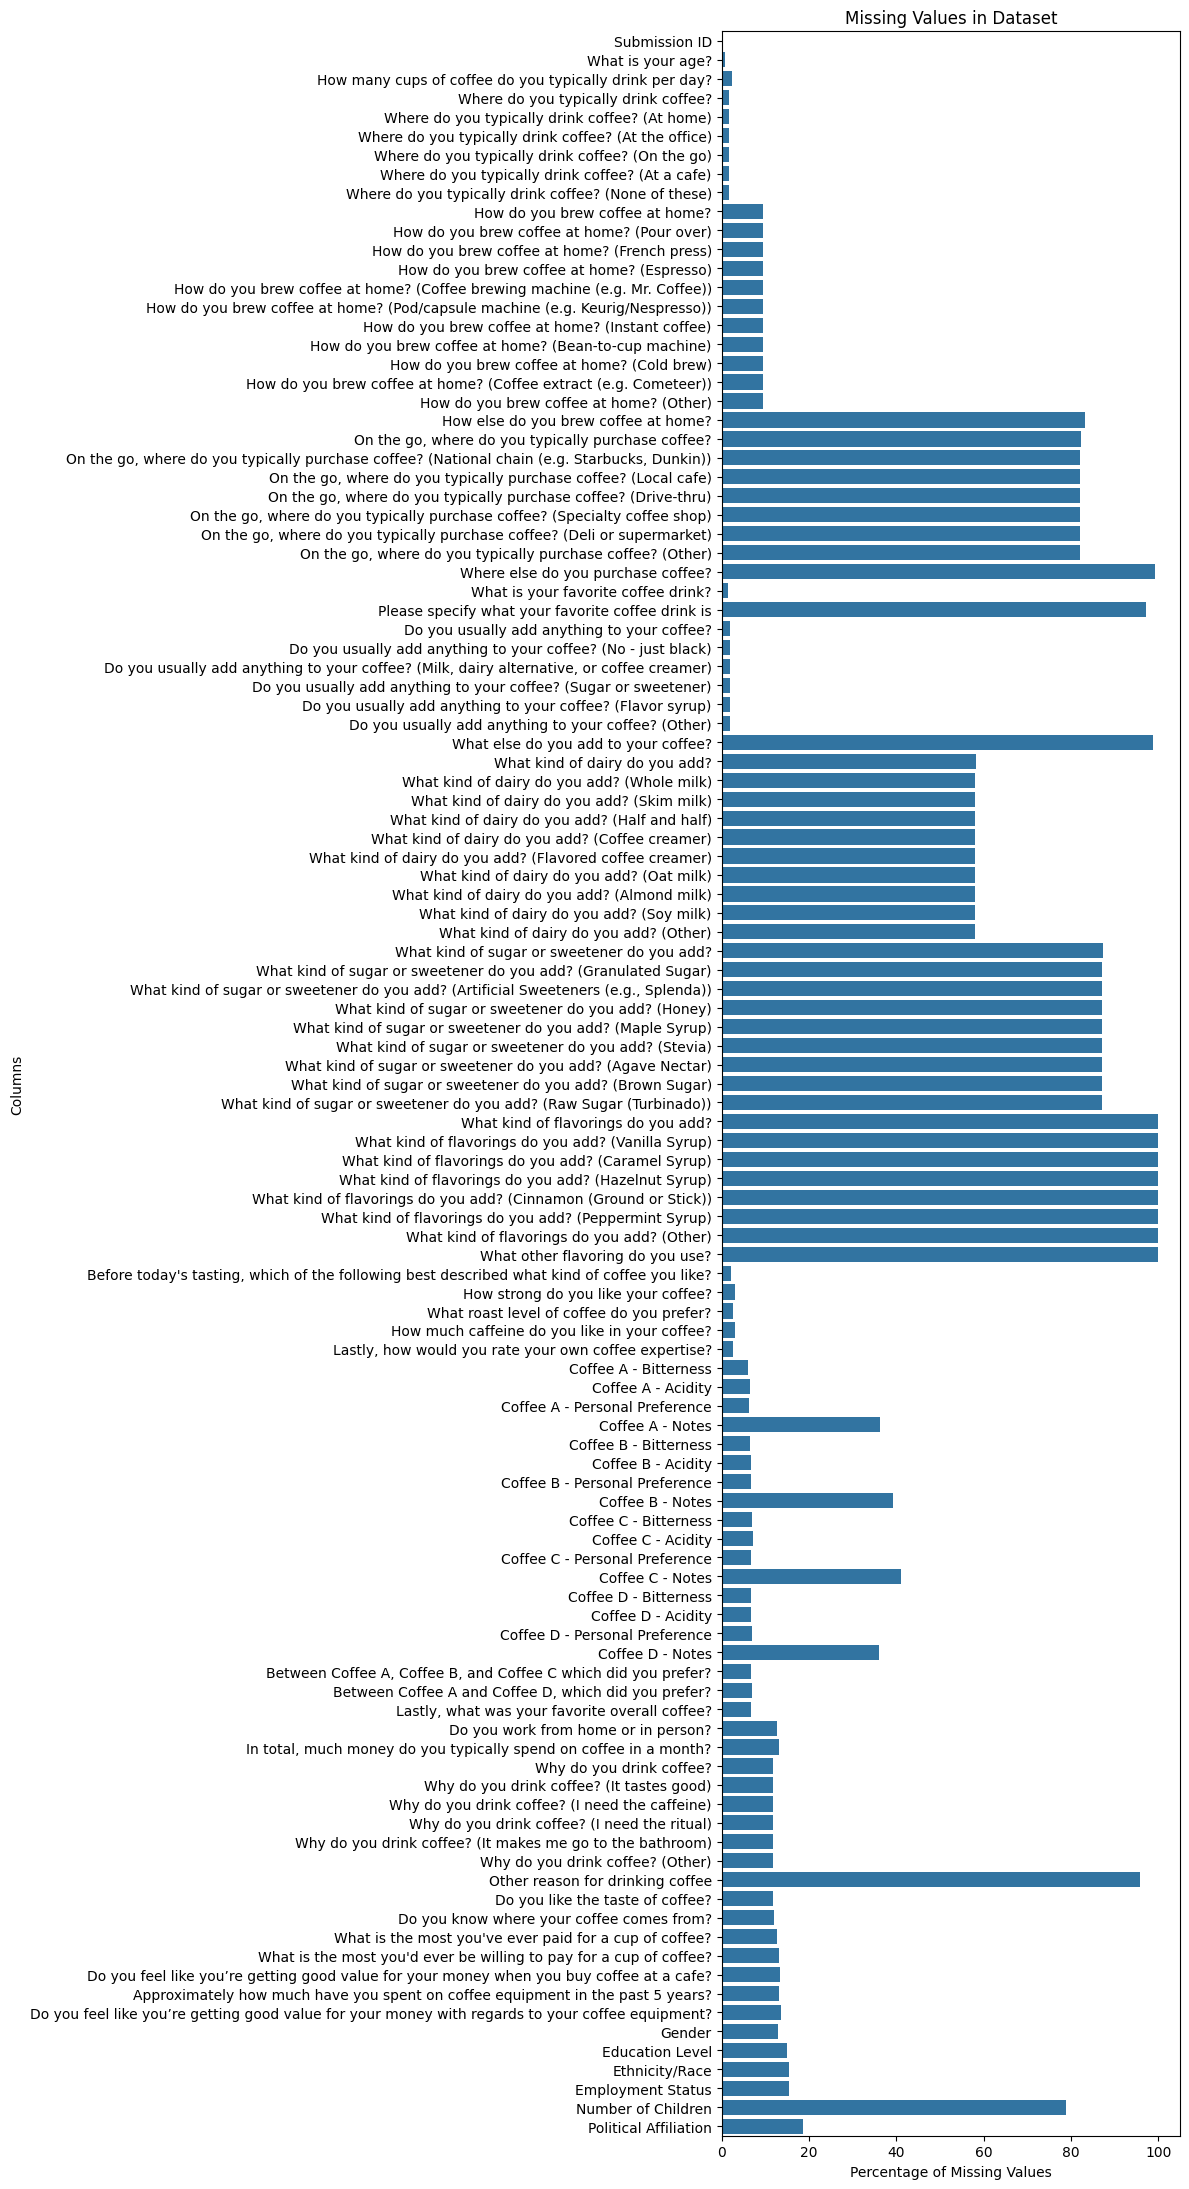

In [ ]:
missing_percentage = df.isnull().sum() * 100 / len(df)
plt.figure(figsize=(12, 22))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index)
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Values in Dataset")
plt.tight_layout()
plt.show()

Ummm, looks like most of the N/A questions are for the "if other" questions, but it's also interesting that to see that 'Coffee Notes' had a high missing rate, potentially due to it being hard to judge the notes.

In addition, the 'Number of Children' columns has a lot of missing values. Let us have a more in depth look at it:

In [ ]:
df['Number of Children'].value_counts()

,count
Number of Children,
2,402
1,310
3,92
More than 3,52


Oh! So it seems that there was not an option for 0 children which may indicate that the majority of people who input N/A here have no children.